## Нейронные сети
Пензин М.С.

penzin.ml.tsu@gmail.com

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from pylab import rcParams
rcParams['figure.figsize'] = 12, 9

## Нейрон

Простейшую модель нейрона можно представить как на картинке ниже

<center>
    <img src="simple.png">
</center>

У нас есть некий набор входных значений, которые поступают в нейрон. Он их как-то обрабатывает, затем выдает результат.

## Модель нейрона

Нейрон можно описать довольно большим количеством способов. Мы же будет работать с частным случаем, который используется повсеместно, который описывается изображением ниже

<img style="background: white" src="neuron.png">

Или тоже самое, но формульно

$$
z = b + \sum_{n=1}^N \omega_n x_n = b + \vec{\omega}^T \vec{x}
$$

если ввести $x_0 = 1$ и $\omega_0 = b$, то можно переписать в чуть более удобной форме

$$
z = \sum_{n=0}^N \omega_n x_n = \vec{\omega}^T \vec{x}
$$

$$
y = f(z)
$$

где $f(z)$ - функция активации

$$
z = \sum_{n=0}^N \omega_n x_n = \vec{\omega}^T \vec{x}
$$

$$
y = f(z)
$$

## Функции активации

In [7]:
x = np.linspace(-5, 5, 1000)

def plot(x, y):
    fig = plt.figure()    
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    plt.grid()
    plt.plot(x, y, lw=5)
    plt.show()

Одной из первых функций активации была функция Хевисайда

$$
f(x) = \left\{
    \begin{align}
        0, \text{ для } x < 0
        \\
        1, \text{ для } x \ge 0
    \end{align}
\right.
$$

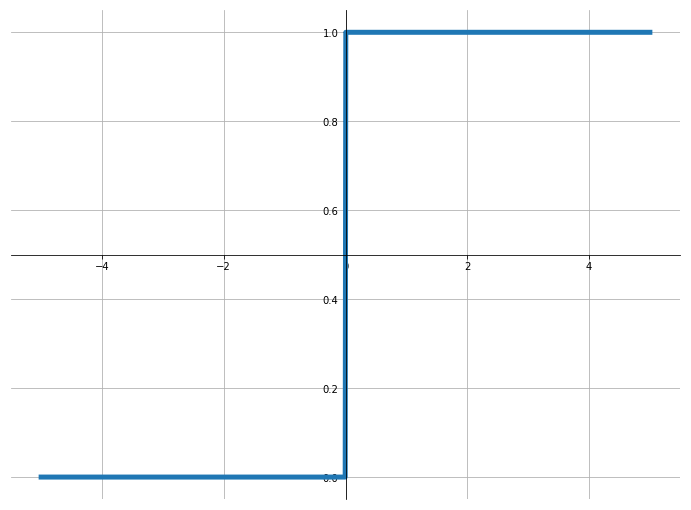

In [8]:
plot(x, np.heaviside(x, 1))

Следующая простейшая функция активации, которая может придти нам в голову - это обычная линейная функция

$$
f(x) = x
$$

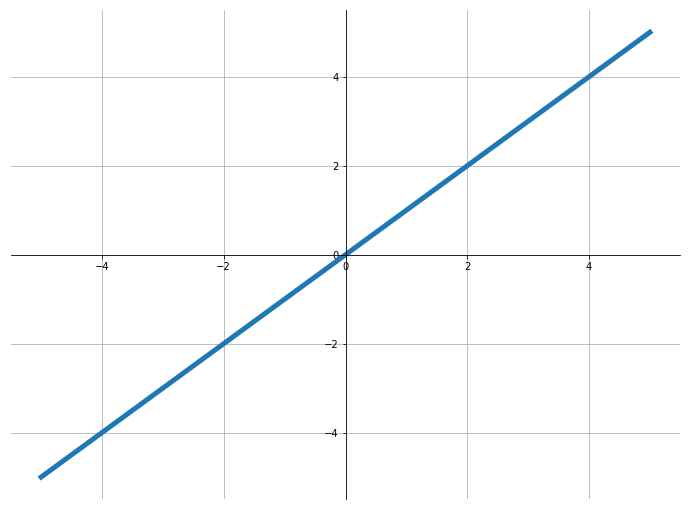

In [9]:
plot(x, x)

Функция Хевисайда не очень удобная для задач оптимизации - у неё рвется производная в нуле. Вместо неё мы можем попробовать взять ее приближение, одним из вариантов - это сигмоида

$$
f(x) = \frac{1}{1 + e^{-\alpha x}}
$$

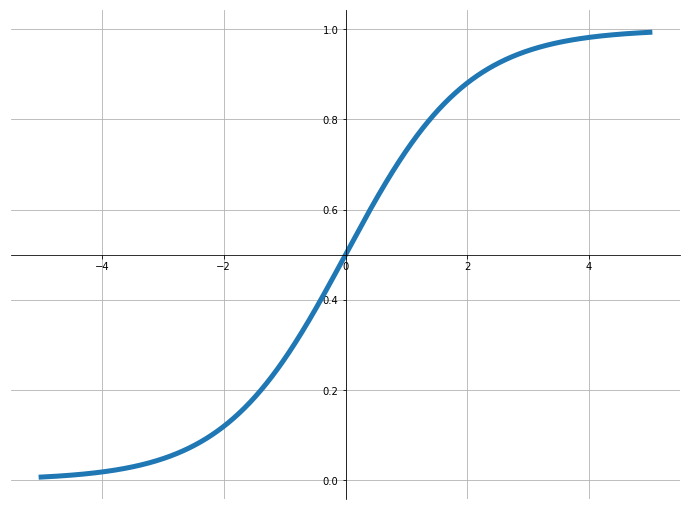

In [10]:
plot(x, 1/(1 + np.exp(-x)))

В настоящее время, весьма хорошо себя показала функция активации ReLU (rectified linear unit)

$$
f(x) = \max(0, x)
$$

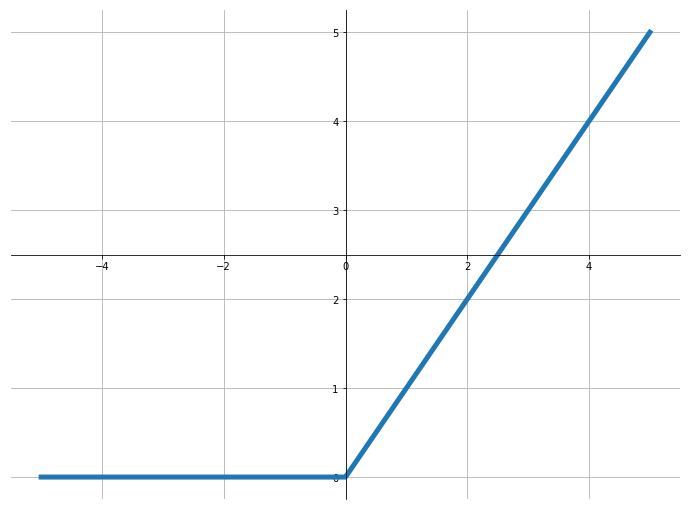

In [11]:
plot(x, np.maximum(x, 0))

## Нейронные сети

Нам ничего не запрещает объединить множество нейронов друг с другом. Такие объединения будем называть нейронными сетями.

<center>
    <img src="net.png">
</center>

## Многослойная сеть

Введем ряд обозначений:
* $n = 1, \dotsc, N$ - номер слоя
* $j = 0, \dotsc, J_n$ - нумерация нейронов внутри слоя, при этом $(j=0)$ будет соответстовать фиктивному нейрону, который всегда выдает 1.
* $x_j$, $\vec{x}$ - входные данные (признаки) 
* $y_j^{(n)}$, $\vec{y}^{(n)}$ - вывод $j$-го нейрона в $n$-ом слое. $y_j^{(0)} = x_j$.
* $f_j^{(n)}$ - функция активации $j$-го нейрона в $n$-ом слое, для простоты будем считать, что для всех нейронов внутри слоя они одинаковы
* $z_j^{(n)}$ - результат суммирования $j$-го нейрона в $n$-ом слое

$$
z_j^{(n)} = \sum_{i=0}^{I_n} \omega_{ij}^{(n)} y^{(n-1)}_i = (\vec{\omega}^{(n)}_j)^T \vec{y}^{(n-1)}
$$

$$
y_j^{(n)} = f_j^{(n)}(z_j^{(n)})
$$

А если ввести матрицу $\mathbf{W}^{(n)}$, в строках которой написаны веса нейронов для слоя $(n)$, то можно записать эти формулы даже проще

$$
\textbf{W}^{(n)} = (\vec{\omega}^{(n)}_1,\vec{\omega}^{(n)}_2, \dotsc, \vec{\omega}^{(n)}_J)^T
$$

$$
\vec{z}^{(n)} = \mathbf{W}^{(n)} \vec{y}^{(n-1)}
$$

$$
\vec{y}^{(n)} = f^{(n)}(\vec{z}^{(n)})
$$

$$
f^{(n)}(\vec{z}^{(n)}) = \left[\begin{align}
f_1^{(n)}(z_1^{(n)})
\\
f_2^{(n)}(z_2^{(n)})
\\
\dotsc
\\
f_J^{(n)}(z_J^{(n)})
\end{align}\right]
$$

## Задачка

Пусть у нас есть набор примеров рукописного текста (числа). Нам нужно придумать нейронную сеть, которая будет распознавать отдельные числа.

In [4]:
from sklearn.datasets import fetch_openml
import pickle

# https://www.openml.org/d/554
# Это займет умеренно существенное время, пока данные скачаются
# MNIST_X, MNIST_y = fetch_openml('mnist_784', version=1, return_X_y=True)
#print(MNIST_X.shape)
#f = open("mnist.pkl3", "wb")
#pickle.dump( (MNIST_X[:10000], MNIST_y[:10000]), f)


f = open("mnist.pkl3", "rb")
MNIST_X, MNIST_y = pickle.load(f)
print(MNIST_X.shape)

(10000, 784)


In [5]:
MNIST_X.shape, MNIST_y.shape

((10000, 784), (10000,))

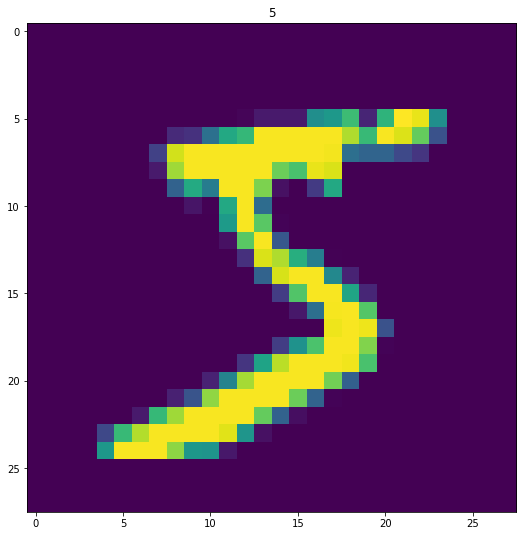

In [6]:
plt.imshow(MNIST_X[0].reshape((28, 28)))
plt.title("%s" % MNIST_y[0])
plt.show()

In [7]:
MNIST_X.min(), MNIST_X.max()

(0.0, 255.0)

In [8]:
print(MNIST_y)

['5' '0' '4' ... '6' '9' '7']


**Входные данные:** изображение, значения пикселей, нормированные на интервал $[0,1]$.


**Выход:** вектор принадлежности к соответствующему классу

Функция активации:

$$
f(x) = \frac{1}{1 + e^{-x}}
$$

<center>
    <img style="background: white" src="net10.png">
<center>

При создании сети, как лучше всего инициализировать веса? 

В общем случае, достаточно проинициализировать случайными значениями.

In [2]:
def plot(clf, X, y):        
    x_max, x_min = X[:, 0].max(), X[:, 0].min()
    y_max, y_min = X[:, 1].max(), X[:, 1].min()
    
    dx = (x_max - x_min) * 0.1    
    dy = (y_max - y_min) * 0.1
    
    xx, yy = np.meshgrid(np.linspace(x_min - dx, x_max + dx, 100),
                         np.linspace(y_min - dy, y_max + dy, 100))
    
    Z = np.zeros(xx.size)
    
    Z = clf.predict(np.vstack([xx.ravel(), yy.ravel()]).T).ravel()
        
    plt.pcolormesh(xx, yy, Z.reshape(xx.shape), cmap=plt.cm.Wistia)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.get_cmap("Wistia"), 
                edgecolors='k', s=50)

In [10]:
class Net:
    def __init__(self, layers, random_state=None):
        self.layers = layers.copy()
        self.random_state = random_state
        self.classes = None # Сюда мы будет кодировать классы
        self.Ws = [None,] # 
            
    def _f(self, z):
        """
            Наша функция активации
        """
        return 1.0 / (1.0 + np.exp(-z))
                        
    def _forward(self, x):
        """
            Вычисление вывода каждого слоя
        """
        x = x.reshape((-1, 1))
        yn = [x,] # вывод нулевого слоя
        for w in self.Ws[1:]:
            x = np.vstack([1, x]) # добавляем сигнал фиктивного нейрона
            x = self._f(w @ x)
            yn.append(x)
        return yn
    
    def _to_dummy(self, y):
        """
            Перевод класса в dummy переменную
        """
        return (self.classes == y).astype('int')
    
    def _predict_proba(self, x):
        yn = self._forward(x)
        return yn[-1].ravel()

    def fit(self, X, y):
        """
            X - массив прецедентов
            y - метки классов (обязательна числа)
        """
        np.random.seed(self.random_state)
        
        self.classes = np.sort(np.unique(y))                
        self.Ws = [None,]
        layers = [X.shape[1]] + self.layers + [self.classes.size]

        for n in range(1, len(layers)):
            Jn = layers[n]
            Jn_1 = layers[n-1]
            # +1 из-за добавки фиктивного нейрона
            self.Ws.append(np.random.normal(0, 1, size=(Jn, Jn_1 + 1)))
    
    def predict_proba(self, X):
        result = []
        for x in X:
            result.append(self._predict_proba(x))
        return np.array(result)
    
    def predict(self, X):
        result = []
        for x in X:
            y = np.argmax(self._predict_proba(x))
            result.append(y)
        return np.array(result)

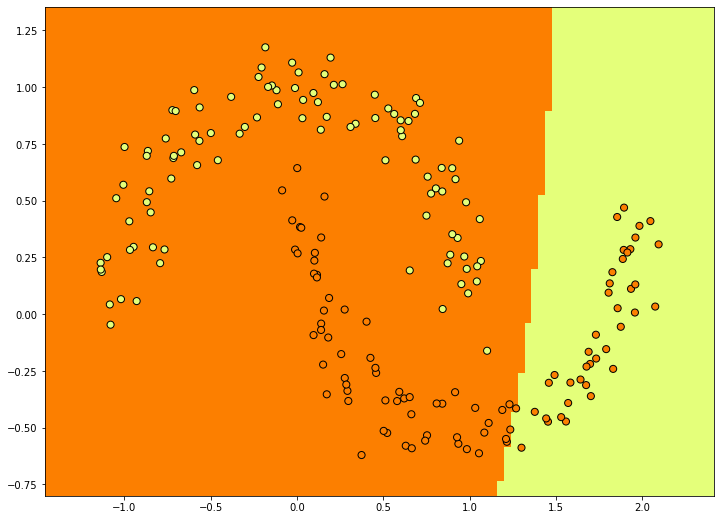

In [12]:
from sklearn.datasets import make_blobs, make_moons

#X, y = make_blobs(200, centers=2, random_state=15, center_box=(-2, 2))
X, y = make_moons(200, noise=0.1, random_state=13)

net = Net([5, 12])
net.fit(X, y)
plot(net, X, y)

## Обучение

Как же можно обучать нейронную сеть?

Необходимо завести функцию потерь, отображающую качество классификации и воспользоваться любым способом её минимизации. 

Мы будем пользоваться градиентным спуском.

## Градиентный спуск

Тут всё довольно просто, мы выбираем функцию потерь в виде

$$
L = \frac{1}{M} \sum_{m=1}^{M} \mathcal{L}_m
$$

Здесь $\mathcal{L}_m$ - функция потери для конкретного объекта.

Находим производную по весам и просто движемся в обратную сторону от направления градиента

$$
\tilde{\omega}_{ij}^{(n)} = 
\omega_{ij}^{(n)} - 
\frac{
    \partial L
}{
    \partial \omega_{ij}^{(n)}
}
=
\omega_{ij}^{(n)} - 
\frac{1}{M}\sum_m
\frac{
    \partial \mathcal{L}_m
}{
    \partial \omega_{ij}^{(n)}
}
$$

## Стохастический градиентный спуск

Для довольно больших объемов данных порой удобнее использовать стохастический градиентный спуск, для которого один шаг оптимизации выглядит следующим образом

$$
\tilde{\omega}_{ij}^{(n)} = 
\omega_{ij}^{(n)} - 
\frac{
    \partial \mathcal{L}_m
}{
    \partial \omega_{ij}^{(n)}
}
$$

## Функции потерь

Выбор функции потерь ограничен только нашим воображением и особенностями поставленной перед нами задачи. Примерами таких функцию могут быть:

* квадратичная ошибка (mse)

$$
\mathcal{L} = \frac{1}{2} (y - \tilde{y})^2
$$

* абсолютная ошибка (mae)

$$
\mathcal{L} = |y - \tilde{y}|
$$

* logloss

$$
\mathcal{L} = -y \ln \tilde{y} - (1-y) \ln (1 - \tilde{y})
$$

## Метод обратного распространения ошибки

В общем случае, искать градиент - это довольно дорогое занятие. У нас огромное количество весов и вычислять для них всех градиент от нашей функции ошибок весьма неудобно.

Выше мы видели, что стохастический градиентный спуск и обычный градиентный спуск отличаются только ссумирование. В обоих случаях берется одна и та же производная от функции потери. Поэтому для простоты рассмотрим функцию потери на одном объекте.

Пусть мы выбрали функцию потерь

$$
\mathcal{L} = \frac{1}{2} (y - \tilde{y})^2
$$

и функцию активации

$$
f(z) = \left( \frac{1}{1+e^{-z}} \right)
$$

Теперь нам нужно лишь найти все производные

$$
\frac{
    \partial \mathcal{L}
}{
    \partial \omega_{ij}^{(n)}
}
$$

Здесь $n$ - это номер слоя.

Рассмотрим обычное взятие производной сложной функции

$$
\frac{\partial \mathcal{L}}{\partial \omega^{(n)}_{ij}} 
= 
\frac{\partial \mathcal{L}}{\partial z^{(n)}_{j}}
\frac{\partial z^{(n)}_{j}}{\partial \omega^{(n)}_{ij}} 
=
\frac{\partial \mathcal{L}}{\partial z^{(n)}_{j}}
y^{(n-1)}_i
$$

где

$$
\frac{\partial z^{(n)}_{j}}{\partial \omega^{(n)}_{ij}} 
= 
\frac{
    \partial (\sum_i \omega_{ij}^{(n)} y_i^{(n-1)})
}{\partial \omega^{(n)}_{ij}} 
=
y_i^{(n-1)}
$$

Обозначим 

$$
\delta_j^{(n)} = \frac{\partial \mathcal{L}}{\partial z^{(n)}_{j}}
$$

$$
\vec{\delta}^{(n)} = \frac{\partial L}{\partial \vec{z}^{(n)}}
$$

Теперь можем записать производную немного проще

$$
\frac{\partial \mathcal{L}}{\partial \vec{\omega}^{(n)}_{j}} 
= 
{\delta}^{(n)}_j
\vec{y}^{(n-1)}
$$

Или совсем просто

$$
\frac{\partial \mathcal{L}}{\partial \mathbf{W}^{(n)}} 
= 
\vec{\delta}^{(n)}
(\vec{y}^{(n-1)})^T
$$

$$
\tilde{\mathbf{W}}^{(n)} = \mathbf{W}^{(n)} - \vec{\delta}^{(n)}
(\vec{y}^{(n-1)})^T
$$

Мы видим, что градиент зависит от выходных данных с предыдущего слоя. Уже значительно лучше, но нам всё ещё нужно найти $\vec{\delta}^{(n)}$

$$
\delta_j^{(n)} 
= 
\frac{\partial \mathcal{L}}{\partial z^{(n)}_{j}} 
= 
\frac{\partial \mathcal{L}}{\partial y^{(n)}_{j}}
\frac{\partial y^{(n)}}{\partial z^{(n)}_{j}}
=
\frac{\partial \mathcal{L}}{\partial y^{(n)}_{j}}
f'(z^{(n)}_{j})
$$

где

$$
y = f(z)
$$

Немного отойдем назад и вспомним, где же $y_j^{(n)}$ встречается в нашей задаче. Это немного сложно представить, но логично предположить. Внутри $\mathcal{L}$ есть $y_j^{(n+1)}$ (выход следующего слоя), которые являются $y_j^{(n)}$. Попробуем перейти от производной по $y_j^{(n)}$ к $y_j^{(n+1)}$

$$
\delta_j^{(n)} 
=
f'(z^{(n)}_{j})
\sum_{k=1}^{J_{n+1}}
\left[
    \frac{\partial \mathcal{L}}{\partial y^{(n+1)}_{k}}
    \frac{\partial y^{(n+1)}_{k}}{\partial z^{(n+1)}_{k}}
    \frac{\partial z^{(n+1)}_{k}}{\partial y^{(n)}_{j}}
\right]
=\\
=
f'(z^{(n)}_{j})
\sum_{k=1}^{J_{n+1}}
\left[
    \frac{\partial \mathcal{L}}{\partial y^{(n+1)}_{k}}
    f'(z^{(n+1)}_{k})
    \omega_{jk}^{(n+1)}
\right]
$$

где 

$$
\frac{\partial z^{(n+1)}_{k}}{\partial y^{(n)}_{j}}
= 
\frac{
    \partial (\sum_i \omega_{ik}^{(n+1)} y_j^{(n)})
}{\partial y^{(n)}_{j}} 
=
\omega_{jk}^{(n+1)}
$$

$$
\delta_j^{(n)} 
=
\frac{\partial \mathcal{L}}{\partial y^{(n)}_{j}}
f'(z^{(n)}_{j})
$$

В итоге, выражение 

$$
\delta_j^{(n)} 
=
f'(z^{(n)}_{j})
\sum_{k=1}^{J_{n+1}}
\left[
    \frac{\partial L}{\partial y^{(n+1)}_{k}}
    f'(z^{(n+1)}_{k})
    \omega_{jk}^{(n+1)}
\right]
$$

в наших новых обозначениях примет вид для $\delta$

$$
\delta_j^{(n)} = f'(z^{(n)}_{j})
\sum_{k=1}^{J_{n+1}}
\left[
    \delta_k^{(n+1)}
    \omega_{jk}^{(n+1)}
\right]
$$

таким образом, мы можем расчитать все $\delta$ зная лишь $\delta^{(N)}$

Давайте мы его найдем

$$
\delta_j^{(N)} 
=
\frac{\partial \mathcal{L}}{\partial y^{(N)}_{j}}
f'(z^{(N)}_{j})
=\\
=(y^{(N)}_j - y_j) y^{(N)}_j (1 - y^{(N)}_j)
$$

где

$$
f'(z) = \left( \frac{1}{1+e^{-z}} \right)'
= \frac{e^{-z}}{(1+e^{-z})^2} = \\
=
\frac{1}{1+e^{-z}} \left(
1 - \frac{1}{1+e^{-z}}
\right) = f(z) (1 - f(z)) = y (1 - y)
$$

Введем новое обозначение (произведение Адамара), такое что

$$
(\mathbf{A} \circ \mathbf{B})_{i,j} = (A)_{i,j} \cdot (B)_{i,j}
$$

то есть мы просто по компонентно перемножаем элементы матриц

С этим обозначением наши выражения можно записать как

$$
\vec{\delta}^{(N)} = \vec{y}^{(N)} \circ (\vec{1} - \vec{y}^{(N)})
\circ  (\vec{y}^{(N)} - \vec{y}) 
$$

$$
\vec{\delta}^{(n)} = \vec{y}^{(N)} \circ (\vec{1} - \vec{y}^{(N)}) \circ
( (\mathbf{W}^{(n+1)})^T \vec{\delta}^{(n+1)} )
$$

$$
\tilde{\mathbf{W}}^{(n)} = \mathbf{W}^{(n)} - \vec{\delta}^{(n)}
(\vec{y}^{(n-1)})^T
$$

## Batch

Вместо чистого стохастического градиентного спуска, мы можем набирать небольшой случайный набор данных (batch) и строить градиент, усредняя на нем.

## Алгоритм

Теперь мы готовы описать алгоритм обратного распространения ошибки:

1. Проинициализировать сеть небольшими случайными значениями
2. Для входных параметров мы расчитываем значение выводов каждого слоя $\vec{y}^{(n)}$ (forward)
3. Рассчитываем ошибку $\vec{\delta}^{(N)}$ и затем от последнего слоя к первому расчитываем остальные $\vec{\delta}^{(n)}$ (backpropagation)
4. Корректируем веса $\mathbf{W}^{(n)}$
5. Перейти к шагу 2

In [13]:
class MSENet(Net):   
    def _loss(self, X, y):
        """
            Функция потерь
        """
        result = 0        
        for xv, yv in zip(X, y):
            dummy = self._to_dummy(yv)
            yp = self._forward(xv)[-1].ravel()
            result += np.sum( (yp - dummy)**2 )
        return result / X.shape[0]
    
    def _fit(self, x, yt):
        x = x.reshape((-1, 1))
        yt = yt.reshape((-1, 1))        
        yn = self._forward(x)
        
        delta = [None for _ in self.Ws]
        delta[-1] = yn[-1] * (1 - yn[-1]) * (yn[-1] - yt)
        
        N = len(self.Ws) - 1
        
        for n in range(N-1, 0, -1):
            tmp = self.Ws[n+1].T @ delta[n+1]
            # А теперь небольшая расплата за то, что у нас
            # на самом деле нет фиктивного нейрона в предыдущем слое
            # поэтому delta[0] мы выкидываем (оно все-равно всегда 0)
            tmp = tmp[1:]
            delta[n] = yn[n] * (1 - yn[n]) * tmp
        
        # Теперь меняем веса
        dWs = [None,]
        for n in range(1, len(self.Ws)):
            yy = np.vstack([1, yn[n-1]])
            dWs.append(delta[n] * yy.T)        
        return dWs
        
    def fit(self, X, y, iterations=1, verbose=0):
        """
            X - массив прецедентов
            y - метки классов (обязательна числа)
        """
        np.random.seed(self.random_state)    
        
        self.classes = np.sort(np.unique(y))        
        self.Ws = [None,]
        layers = [X.shape[1]] + self.layers + [self.classes.size]

        for n in range(1, len(layers)):
            Jn = layers[n]
            Jn_1 = layers[n-1]
            # +1 из-за добавки фиктивного нейрона
            self.Ws.append(np.random.normal(0, 1, size=(Jn, Jn_1 + 1)))
                    
        if verbose > 0:
            Lb = self._loss(X, y)
            print("L before = ", Lb)
        
        for step in range(iterations):
            idx = np.random.choice(X.shape[0])
                
            dW = [None, ]
            for w in self.Ws[1:]:
                dW.append(np.zeros(w.shape))

            
            tmp = self._fit(X[idx], self._to_dummy(y[idx]))
            for n in range(1, len(layers)):
                dW[n] += tmp[n]

            for n in range(1, len(layers)):
                self.Ws[n] -= dW[n]
            
            if verbose > 1:
                L = self._loss(X, y)
                print("L #%5d = " % step, L)
                
        if verbose > 0:
            La = self._loss(X, y)
            print("L after = ", La)    

In [14]:
%%time

from sklearn.datasets import make_blobs, make_moons

#X, y = make_blobs(200, centers=2, random_state=15, center_box=(-2, 2))
X, y = make_moons(200, noise=0.1, random_state=13)

net = MSENet([3,], random_state=13)
net.fit(X, y, iterations=100000, verbose=1)

L before =  0.5981571803705672
L after =  0.00026865576365428507
CPU times: user 12.4 s, sys: 0 ns, total: 12.4 s
Wall time: 12.5 s


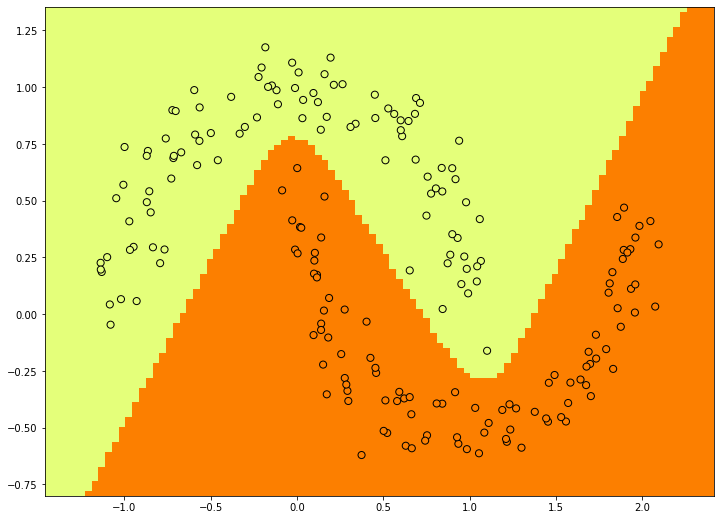

In [15]:
plot(net, X, y)

## Распознавание чисел

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

f = open("mnist.pkl3", "rb")
MNIST_X, MNIST_y = pickle.load(f)
f.close() 

MNIST_X = MNIST_X / 255
MNIST_y = np.array(list(map(int, MNIST_y)))
X_t, X_v, y_t, y_v = train_test_split(MNIST_X, MNIST_y, random_state=42)

In [18]:
%%time

net = MSENet([15], random_state=42)
net.fit(X_t, y_t, iterations=100000, verbose=1)
y_p = net.predict(X_v)

print("Accuracy =", accuracy_score(y_v, y_p))

L before =  2.5772135874977034
L after =  0.13150905273485283
Accuracy = 0.8984
CPU times: user 25.2 s, sys: 12.9 s, total: 38.1 s
Wall time: 19.3 s


Давайте теперь попробуем другую функцию потерь.

Функция потерь для многоклассовой классификации

$$
\mathcal{L} = - \sum_j  \left[
    y_j \ln \tilde{y}_j + (1 - y_j) \ln (1 - \tilde{y}_j)
\right]
$$

$$
\delta_j^{(N)} 
=
\frac{\partial \mathcal{L}}{\partial y^{(N)}_{j}}
f'(z^{(N)}_{j})
=\\
=(y^{(N)}_j - y_j)
$$


In [19]:
class LoglossNet(Net):
    def _loss(self, X, y):
        """
            Функция потерь
        """
        result = 0        
        for xv, yv in zip(X, y):
            dummy = self._to_dummy(yv)
            yp = self._forward(xv)[-1].ravel()
            for yyp, yyv in zip(yp, dummy):
                if yyv == 0:
                    result += -np.log(1-yyp)
                else:
                    result += -np.log(yyp)
        return result / X.shape[0]                        
    
    def _fit(self, x, yt):
        x = x.reshape((-1, 1))
        yt = yt.reshape((-1, 1))        
        yn = self._forward(x)
        
        delta = [None for _ in self.Ws]
        delta[-1] = (yn[-1] - yt)
        
        N = len(self.Ws) - 1
        
        for n in range(N-1, 0, -1):
            tmp = self.Ws[n+1].T @ delta[n+1]
            # А теперь небольшая расплата за то, что у нас
            # на самом деле нет фиктивного нейрона в предыдущем слое
            # поэтому delta[0] мы выкидываем (оно все-равно всегда 0)
            tmp = tmp[1:]
            delta[n] = yn[n] * (1 - yn[n]) * tmp
        
        # Теперь меняем веса
        dWs = [None,]
        for n in range(1, len(self.Ws)):
            yy = np.vstack([1, yn[n-1]])
            dWs.append(delta[n] * yy.T)        
        return dWs

    def fit(self, X, y, batch=1, epoch=1, verbose=0):
        """
            X - массив прецедентов
            y - метки классов (обязательна числа)
        """
        np.random.seed(self.random_state)    
        
        self.classes = np.sort(np.unique(y))        
        self.Ws = [None,]
        layers = [X.shape[1]] + self.layers + [self.classes.size]

        for n in range(1, len(layers)):
            Jn = layers[n]
            Jn_1 = layers[n-1]
            # +1 из-за добавки фиктивного нейрона
            self.Ws.append(np.random.normal(0, 1, size=(Jn, Jn_1 + 1)))
                    
        if verbose > 0:
            Lb = self._loss(X, y)
            print("L before = ", Lb)
        
        for step in range(epoch):
            idxs = []
            
            if batch is None:
                # Если не нужно использовать данные мелкими кусочками
                idxs = [np.arange(0, X.shape[0])]
            else:
                # перемешиваем индексы
                tmp = np.arange(0, X.shape[0])
                np.random.shuffle(tmp)
                # и добавляем их в массив
                for n in range(0, X.shape[0], batch):
                    idxs.append(tmp[n:n+batch])
            
            for idx in idxs:
                dW = [None, ]
                for w in self.Ws[1:]:
                    dW.append(np.zeros(w.shape))

                for i in idx:                
                    tmp = self._fit(X[i], self._to_dummy(y[i]))
                    for n in range(1, len(layers)):
                        dW[n] += tmp[n]

                for n in range(1, len(layers)):
                    self.Ws[n] -= 3 * dW[n] / idx.size
            
            if verbose > 1:
                L = self._loss(X, y)
                print("L #%5d = " % step, L)
                
        if verbose > 0:
            La = self._loss(X, y)
            print("L after = ", La)    

In [20]:
%%time

X, y = make_moons(200, noise=0.1, random_state=13)
net = LoglossNet([3,])
net.fit(X, y, epoch=500, batch=10, verbose=1)

L before =  2.022130597635569
L after =  0.0011427701134316037
CPU times: user 9.61 s, sys: 0 ns, total: 9.61 s
Wall time: 9.65 s


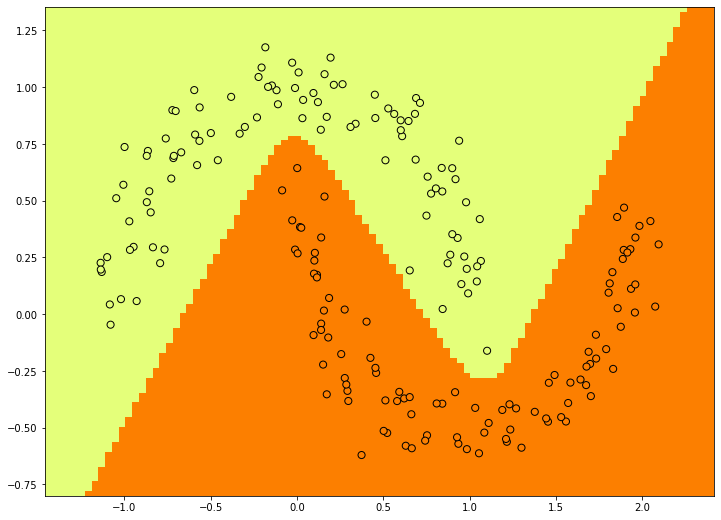

In [21]:
plot(net, X, y)

In [23]:
%%time

net = LoglossNet([15], random_state=42)
net.fit(X_t, y_t, epoch=100, batch=10, verbose=1)
y_p = net.predict(X_v)

print("Accuracy =", accuracy_score(y_v, y_p))

L before =  7.8010784997654135
L after =  0.2650511460003083
Accuracy = 0.9096
CPU times: user 2min 14s, sys: 1min 10s, total: 3min 24s
Wall time: 1min 43s


## Плюсы Backpropagation

* быстро вычисляется
* легко обобщается на любые функции активации, функции потерь и число слоев
* возможность online-обучения
* легко распараллеливается

## Проблемы Backpropagation

* сходимость не всегда хорошая
* локальные минимумы
* взрыв градиента
* паралич сети
* переобучение

## Softmax

В предыдущем случае всё получилось отлично, т.к. мы взяли специфическую функцию потерь и функцию активации, но что если у нас функция активации не ограничена?

Мы можем получить тогда произвольное значение целевого признака.

Нам бы хотелось получить на выходах нейронной сети нечто, что было бы очень похоже на вероятности

Идея в том, чтобы заменить последний слой нейронов, отвечающих за выход, специфическим softmax-слоем.

$$
z_j^{(N)} = \sum_i \omega^{(N)}_{ij} y_i^{(N-1)}
$$

$$
y_j^{(N)} = \frac{
    e^{z_j^{(N)}}
}{
    \sum_k e^{z_k^{(N)}}
}
$$

В этом случае

$$
\sum_j y_j^{(N)} = 1
$$

## Регуляризация

При обучении, у нас нет никаких ограничений на веса, что может приводить к печальным последствиям. Неплохим решением является регуляризация весов.

$$
L = \frac{1}{M} \sum_m \mathcal{L}_m + \lambda \frac{1}{M} \sum_m \mathcal{R}_m
$$

## L2-регуляризация

Самый простой вариант регуляризации - это просто сумма квадратов всех весов модели
$$
\mathcal{R} = \sum_n \sum_i \sum_j (\omega^{(n)}_{ij})^2
$$

$$
\tilde{\mathbf{W}}^{(n)} = (1 - \lambda) \mathbf{W}^{(n)} - \vec{\delta}^{(n)}
(\vec{y}^{(n-1)})^T
$$

## Dropout

Довольно интересной техникой по борьбе с переобучением сети является метод случайного отключения нейронов.

Во время обучения(и только во время его), мы просто отключаем нейроны с некоторой вероятностью. Это эквивалентно тому, что мы просто умножаем $\vec{y}$ на некоторый вектор случайных величин $\vec{d}$.

При этом $d_j = 0$ с вероятностью $p$ и $d_j = 1$ с  вероятностью $q = 1-p$.

Во время обучения у нас ничего не меняется (кроме домножения на случайный вектор)

$$
\vec{y}^{(n)} = \vec{d}^{(n)} \circ f(\vec{z}^{(n)})
$$

а вот во время нормальной работы сети из-за того, что в слое во время обучения было меньше нейронов, нужно отмасштабировать вход

$$
\vec{y}^{(n)} = q f(\vec{z}^{(n)})
$$

На практике обычно используют обратные значения, масштабируя значения во время обучения и не меняя значения во время работы сети

во время обучения

$$
\vec{y}^{(n)} = \frac{1}{q} \vec{d}^{(n)} \circ f(\vec{z}^{(n)})
$$

во время работы

$$
\vec{y}^{(n)} =f(\vec{z}^{(n)})
$$

## sklearn

В sklearn уже реализована простейшая многослойная нейронная сеть с поддержкой регуляризации и различных видов функций активации

* __[MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)__
* __[MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor)__

In [24]:
%%time
from sklearn.neural_network import MLPClassifier

net = MLPClassifier([30], activation='logistic', solver='adam', tol=0.0001, max_iter=200,
                    random_state=42)

net.fit(X_t, y_t)
y_p = net.predict(X_v)

print("Accuracy =", accuracy_score(y_v, y_p))

Accuracy = 0.9352
CPU times: user 20.7 s, sys: 7.64 s, total: 28.4 s
Wall time: 14.6 s


In [25]:
net = MLPClassifier([50], activation='logistic', 
                    warm_start=True, alpha=0, max_iter=1,
                    solver='adam', tol=1e-12,random_state=42)

x = np.arange(1, 2000, 1)
y = []
y2 = []

for step in x:
    net.fit(X_t, y_t)
    
    y_p = net.predict(X_v)
    y.append(accuracy_score(y_v, y_p))
    
    y2_p = net.predict(X_t)
    y2.append(accuracy_score(y_t, y2_p))
    
    #print("X = %6d, Acc = %.5f (%.5f)" % (step, y[-1], y2[-1])) 

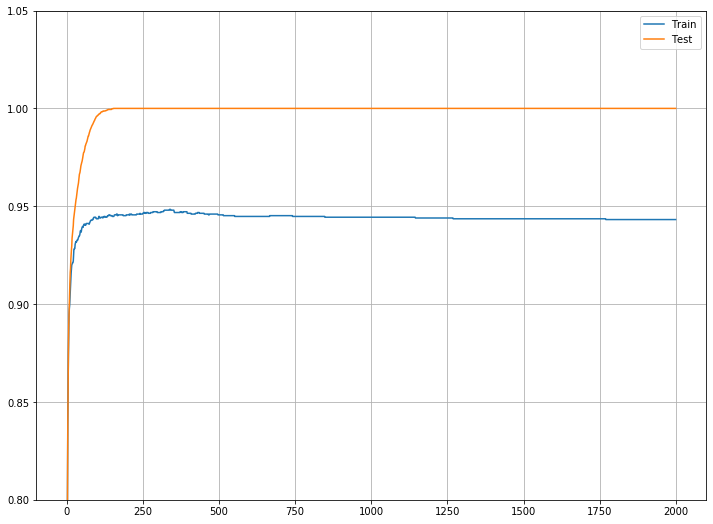

In [27]:
plt.ylim([0.8, 1.05])
plt.plot(x, y, label="Test")
plt.plot(x, y2, label="Train")
plt.grid()
plt.legend()
plt.show()